Twitter Sentiment Analysis

In [1]:
import re
import nltk 
import string
import warnings 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression


In [4]:
from google.colab import files
files.upload()

Saving training.csv to training.csv


In [5]:
data = pd.read_csv("training.csv",encoding='latin-1')
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "TweetText"]
data.columns = DATASET_COLUMNS
data.head()

,target,ids,date,flag,user,TweetText
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [7]:
data.drop(['ids','date','flag','user'],axis = 1,inplace = True)

In [8]:
data.head()

,target,TweetText
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,@Kwesidei not the whole crew


In [9]:
positif_data = data[data.target==4].iloc[:,:]
print(positif_data.shape)
negative_data = data[data.target==0].iloc[:,:]
print(negative_data.shape)

(800000, 2)
(799999, 2)


In [10]:
tweet_df = pd.concat([positif_data,negative_data],axis = 0)
print(tweet_df.shape)
tweet_df.head()

(1599999, 2)


,target,TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!
800000,4,im meeting up with one of my besties tonight! Cant wait!! - GIRL TALK!!
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart."
800002,4,"Being sick can be really cheap when it hurts too much to eat real food Plus, your friends make you soup"
800003,4,@LovesBrooklyn2 he has that effect on everyone


In [11]:
100*tweet_df.isna().sum()/len(tweet_df)

target       0.0
TweetText    0.0
dtype: float64

In [44]:
from wordcloud import WordCloud,STOPWORDS
def createWrdCloudForSentiment(target):
    temp_df = pd.DataFrame() 
    if target == -1:
        temp_df = tweet_df
    else:
        temp_df = tweet_df[tweet_df.target==target]
    words = " ".join(temp_df.clean_tweet)
    wrdcld = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1500,
                      height=1000).generate(words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

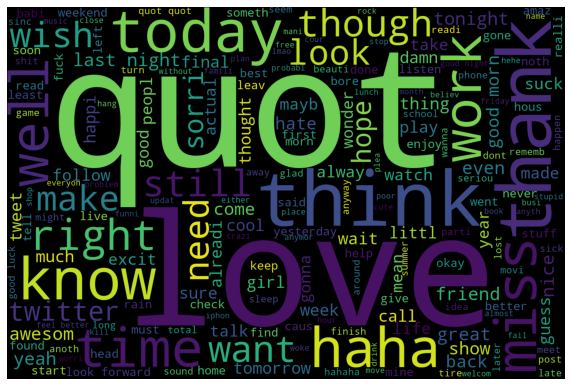

In [45]:
createWrdCloudForSentiment(-1)

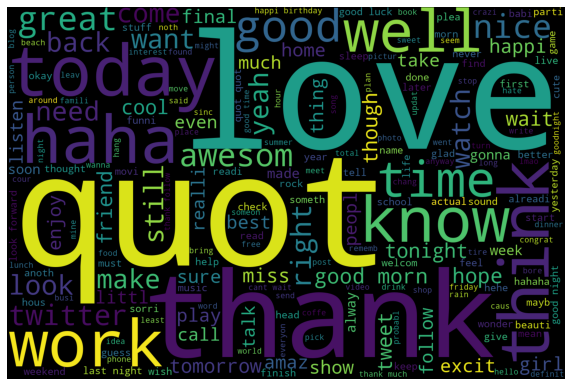

In [46]:
createWrdCloudForSentiment(4)

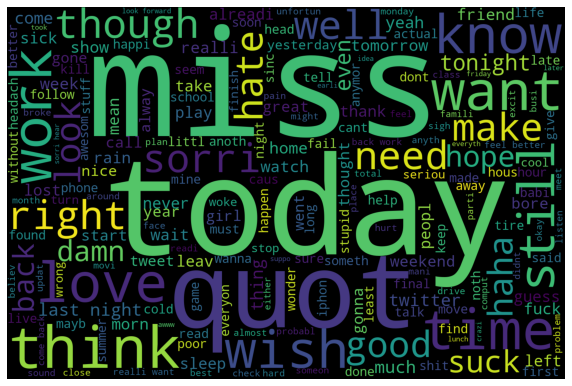

In [47]:
createWrdCloudForSentiment(0)

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
stopwords=nltk.corpus.stopwords.words('english')

In [14]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [15]:
from nltk.stem.porter import PorterStemmer
def cleanup_tweets(tweet_df):
    # remove handle
    tweet_df['clean_tweet'] = tweet_df['TweetText'].str.replace("@", "") 
    # remove links
    tweet_df['clean_tweet'] = tweet_df['clean_tweet'].str.replace(r"http\S+", "") 
    # remove punctuations and special characters
    tweet_df['clean_tweet'] = tweet_df['clean_tweet'].str.replace("[^a-zA-Z]", " ") 
    # remove stop words
    tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda text : remove_stopwords(text.lower()))
    # split text and tokenize
    tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: x.split())
    # let's apply stemmer
    stemmer = PorterStemmer()
    tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
    # stitch back words
    tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: ' '.join([w for w in x]))
    # remove small words
    tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [16]:
cleanup_tweets(tweet_df)

In [17]:
tweet_df.clean_tweet[0:5]

799999                                          love health uandpet best
800000                            meet besti tonight cant wait girl talk
800001    darealsunisakim thank twitter sunisa meet show area sweetheart
800002            sick realli cheap hurt much real food friend make soup
800003                                      lovesbrooklyn effect everyon
Name: clean_tweet, dtype: object

In [18]:
X_train, X_test, y_train, y_test = train_test_split(tweet_df.clean_tweet,tweet_df.target, test_size=0.3)

In [19]:
vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,3)) 
vectorizer.fit(X_train.values)          
x_tr=vectorizer.transform(X_train.values)
x_te=vectorizer.transform(X_test.values)

In [20]:
logistic_regression = LogisticRegression()

In [21]:
clf = logistic_regression.fit(x_tr, y_train)

In [39]:
clf.predict(vectorizer.transform(["I hate peanut butter.","im having a great day"]))

array([0, 4])

In [40]:
logistic_regression.score(x_te, y_test)

0.76545

In [ ]:
print(x_te[0])

  (0, 75574)	0.3226644341600966
  (0, 75353)	0.13238382896130882
  (0, 74429)	0.13397881147950808
  (0, 57835)	0.30596756001773784
  (0, 52035)	0.3757019521175695
  (0, 51986)	0.2098576285127739
  (0, 28215)	0.1574502035469408
  (0, 23599)	0.30233646269086345
  (0, 23591)	0.24216955446723398
  (0, 8826)	0.2340482570780192
  (0, 6584)	0.30247974731151417
  (0, 6510)	0.33512857410080493
  (0, 6502)	0.38493608851999045


In [41]:
y_predicted = logistic_regression.predict(x_te)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[177762,  62281],
       [ 50303, 189654]])

Text(69.0, 0.5, 'truth')

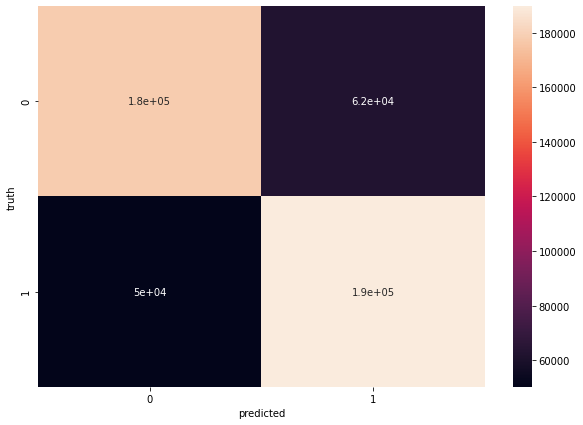

In [42]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [43]:
 from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76    240043
           4       0.75      0.79      0.77    239957

    accuracy                           0.77    480000
   macro avg       0.77      0.77      0.77    480000
weighted avg       0.77      0.77      0.77    480000

